In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# bostonデータ
boston = datasets.load_boston()

# データの属性リスト表示
# データの説明表示
# データのサイズ表示
# データのラベル表示
# データの説明表示
print('\ndir: {}'.format(dir(boston)))
print('\ndata.shape: {}'.format(boston.data.shape))
print('\ndata.feature_names: {}'.format(boston.feature_names)) 
print('\ntarget: {}'.format(boston.target[:40]))
print('\nDESCR: {}'.format(boston.DESCR))


dir: ['DESCR', 'data', 'feature_names', 'target']

data.shape: (506, 13)

data.feature_names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

target: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8]

DESCR: Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentrat

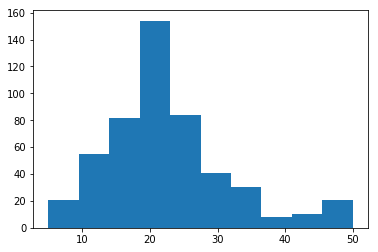

In [3]:
# targetのヒストグラム
plt.hist(boston.target)
plt.show()

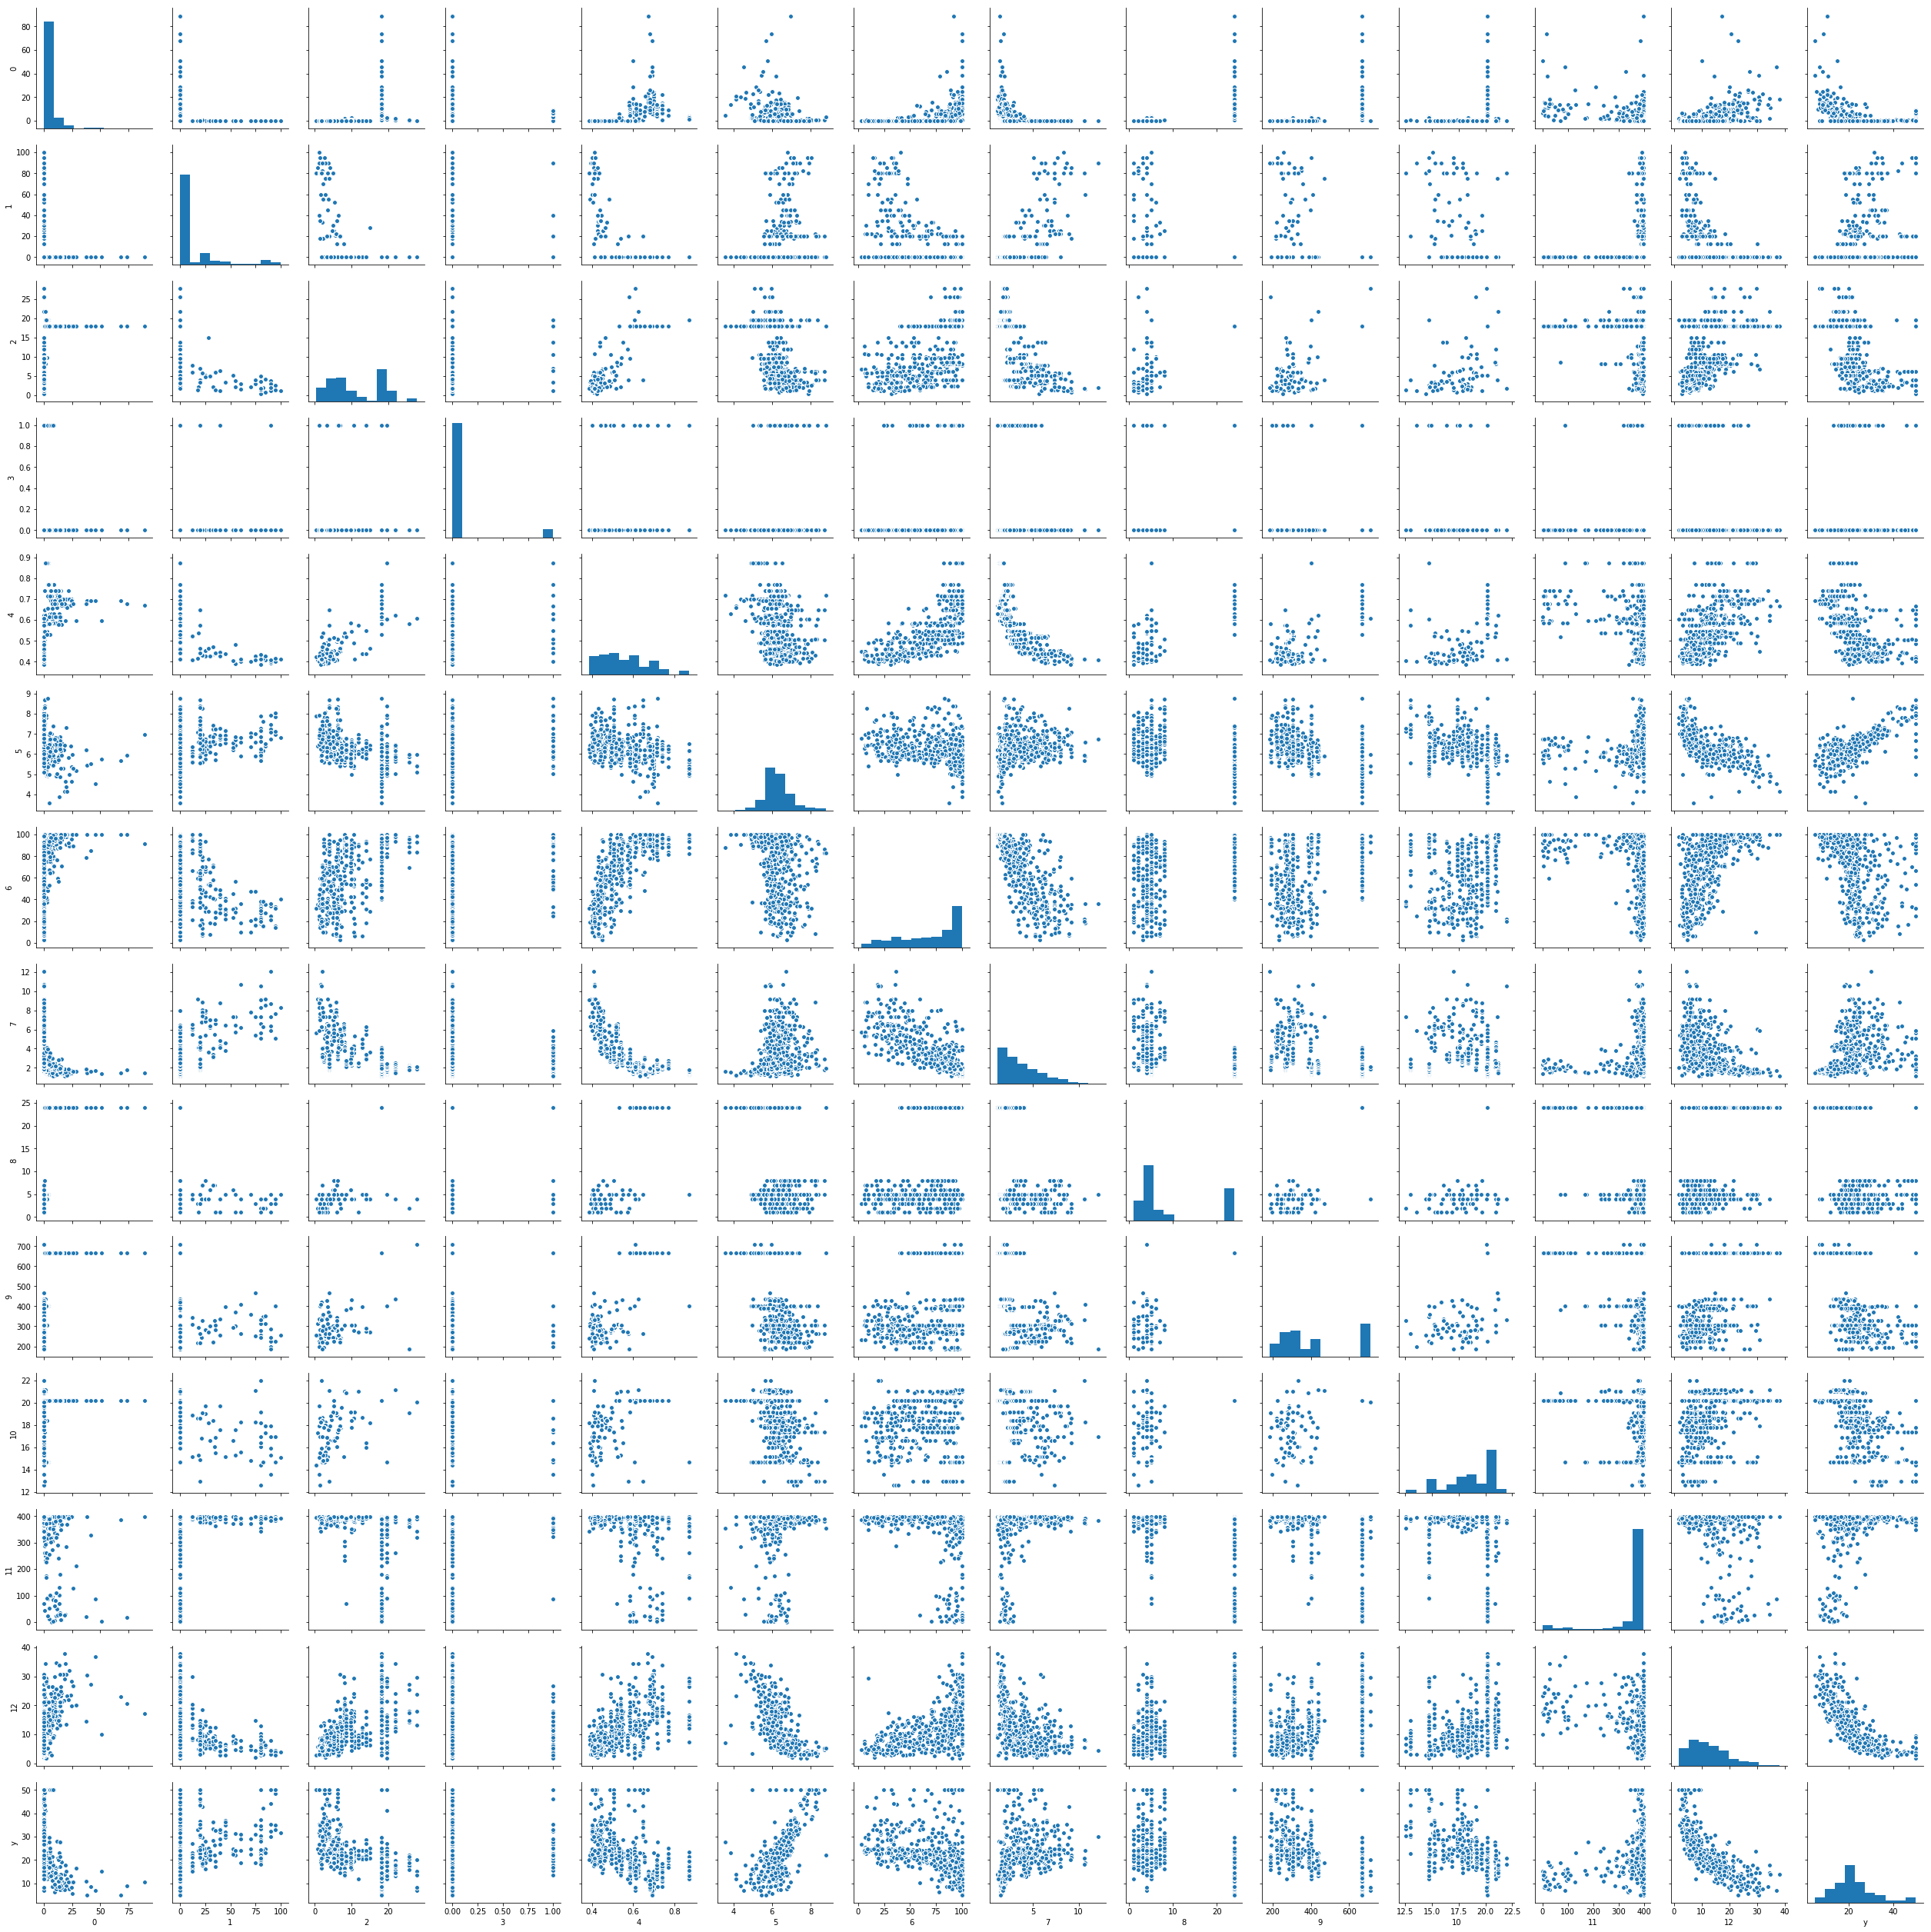

In [4]:
# 各特徴量で散布図作成
X = boston.data
y = boston.target
dfX = pd.DataFrame(boston.data)
dfXy = dfX.assign(y = boston.target)
sns.pairplot(dfXy);

In [18]:
# モデル作成
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(boston.data, boston.target)
regr_2.fit(boston.data, boston.target)

# print(cross_val_score(regr_1, boston.data, boston.target, cv=5, scoring='r2'))
# print(cross_val_score(regr_2, boston.data, boston.target, cv=5, scoring='r2'))
print(cross_val_score(regr_1, boston.data, boston.target, cv=5, scoring='mean_squared_error'))
print(cross_val_score(regr_2, boston.data, boston.target, cv=5, scoring='mean_squared_error'))

[-19.36290091 -25.777347   -58.6167565  -63.18813886 -41.21802825]
[-10.55398263 -47.30522267 -22.05626182 -44.99652029 -68.02112149]


C:\Users\tsk_sato\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\tsk_sato\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\tsk_sato\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\tsk_sato\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\tsk_sato\An

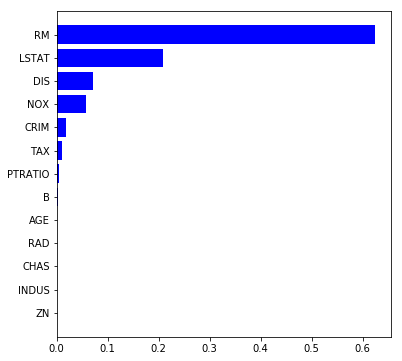

In [6]:
# importance可視化
features = boston.feature_names
importances = regr_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()